In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet



In [ ]:
renewable_data = pd.read_csv('Renewable_Energy.csv')


In [ ]:
columns_to_melt = ['Technology','F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
                   'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
                   'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021',
                   'F2022', 'F2023']
filtered_data = renewable_data[columns_to_melt]


In [ ]:
long_format_data = pd.melt(filtered_data, id_vars=['Technology'],
                           var_name='Year', value_name='Production')



In [ ]:

#long_format_data['Year'] = long_format_data['Year'].astype(int)
#long_format_data.dropna(subset=['production'], inplace = True)

long_format_data['Year'] = long_format_data['Year'].astype(str).str.replace('F', '').astype(int)
long_format_data.dropna(subset=['Production'], inplace = True)
print(long_format_data['Year'].unique())




[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [ ]:
total_production_by_tech = long_format_data.groupby('Technology')['Production'].sum().sort_index(ascending=False)


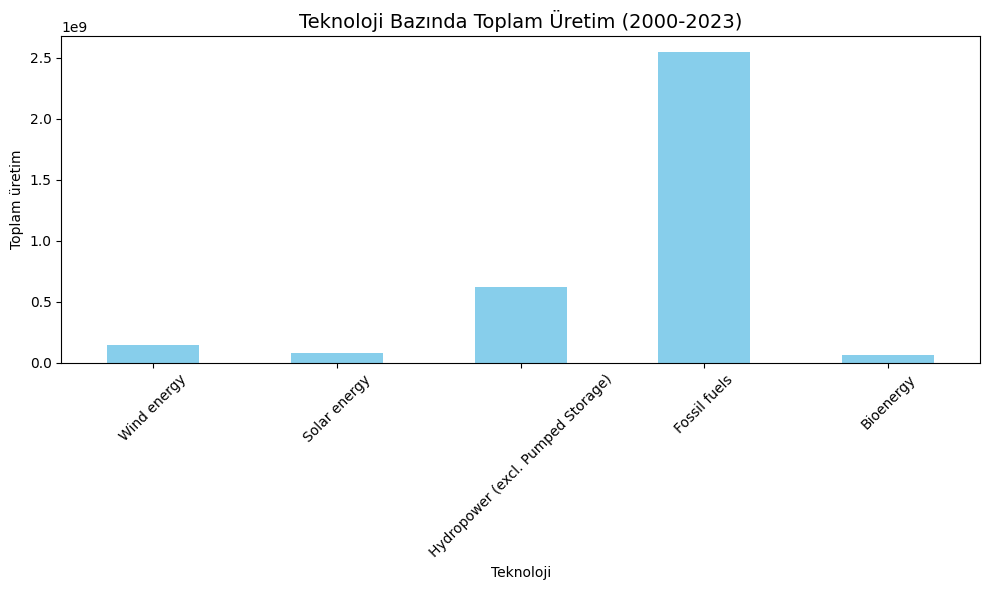

In [ ]:
plt.figure(figsize=(10, 6))
total_production_by_tech.plot(kind='bar', color='skyblue')
plt.title('Teknoloji Bazında Toplam Üretim (2000-2023)', fontsize = '14')
plt.ylabel('Toplam üretim')
plt.xlabel('Teknoloji')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()


In [ ]:
long_format_data['Production_Lag'] = long_format_data.groupby('Technology')['Production'].shift(1)
long_format_data['Growth_Rate'] = (long_format_data['Production'] - long_format_data['Production_Lag']) / long_format_data['Production_Lag'] * 100



In [ ]:
avg_growth_by_tech = long_format_data.groupby('Technology')['Growth_Rate'].mean().sort_values(ascending=False)


In [ ]:
avg_growth_by_tech.head()

,Growth_Rate
Technology,
Fossil fuels,3.259431e+06
Wind energy,3.197563e+06
Solar energy,8.944738e+05
Hydropower (excl. Pumped Storage),6.297440e+05
Bioenergy,8.073446e+04


In [ ]:
top_technology = total_production_by_tech.index[0]

In [ ]:
tech_data = long_format_data[long_format_data['Technology'] == top_technology]
tech_data_arima = tech_data[['Year', 'Production']].groupby('Year').sum().reset_index()


In [ ]:
X = tech_data_arima['Production']
model = ARIMA(X, order=(5, 1, 0))
model_fit = model.fit()
model_fit

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
forecast = model_fit.forecast(steps=5)


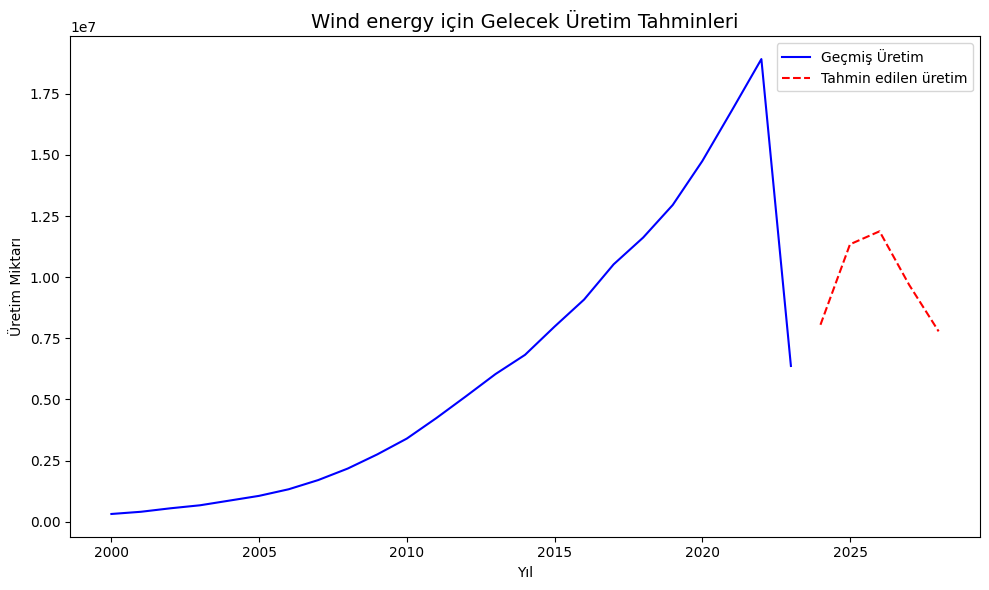

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(tech_data_arima['Year'], tech_data_arima['Production'], label = 'Geçmiş Üretim', color = 'blue')
plt.plot(range(2024,2029), forecast, label = 'Tahmin edilen üretim', color= 'red', linestyle = '--')
plt.title(f'{top_technology} için Gelecek Üretim Tahminleri', fontsize = '14')
plt.xlabel('Yıl')
plt.ylabel('Üretim Miktarı')
plt.legend()
plt.tight_layout()
plt.show()
